In [1]:
## Loading the pizza_sale data, dataset using pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



df = pd.read_csv('pizza_sales_dataset.csv')


In [2]:
df.shape

(48620, 12)

In [3]:
df.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01/01/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01/01/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01/01/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01/01/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01/01/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [5]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [6]:
## Renaming columns,removing spaces and making column name lowercase(small letters)

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.rename(columns={'pizza_name_id':'pizza_name_by_id'}, inplace=True)

df.columns

Index(['pizza_id', 'order_id', 'pizza_name_by_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [7]:
## Summary statistics using .describe(include='all') 

df.describe()  ## only numerical columns are included
 
 ## df.describe(include='all') (all columns are included using this)

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [8]:

## Checking if missing data or null values are present in the dataset

df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_by_id     0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [9]:
##   Convert order_date  to datetime objects


df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y')

In [10]:
df['unit_price'].value_counts()

unit_price
20.75    8685
12.00    5600
16.00    4474
16.75    4294
16.50    4040
12.50    3328
20.25    3032
12.75    2507
20.50    1998
18.50    1359
17.95    1273
16.25    1114
10.50    1001
12.25     830
9.75      739
15.25     712
14.75     577
11.00     570
25.50     544
23.65     480
13.25     473
14.50     391
17.50     381
21.00     190
35.95      28
Name: count, dtype: int64

In [11]:
df['unit_price'].min()

np.float64(9.75)

In [12]:
df['unit_price'].max()

np.float64(35.95)

In [13]:

## creating a price band for pizza

bins = [8, 15,22 , float('inf')]
labels = ['Low', 'Med', 'High' ]

df['price_band'] = pd.cut(df['unit_price'], bins=bins, labels=labels, right=False)


<Axes: xlabel='price_band'>

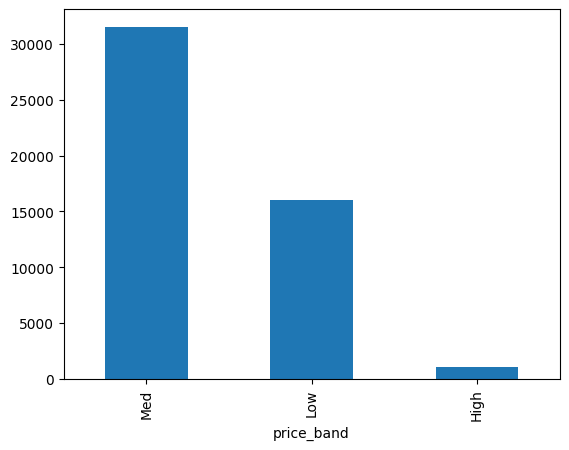

In [14]:
## Ploating bar graph of price bands counts

df['price_band'].value_counts().plot(kind='bar')

Value Counts for 'price_band':


<Axes: xlabel='price_band'>

Value Counts for 'pizza_name_by_id':


<Axes: xlabel='pizza_name_by_id'>

Value Counts for 'pizza_size':


<Axes: xlabel='pizza_size'>

Value Counts for 'pizza_category':


<Axes: xlabel='pizza_category'>

Value Counts for 'pizza_name':


<Axes: xlabel='pizza_name'>

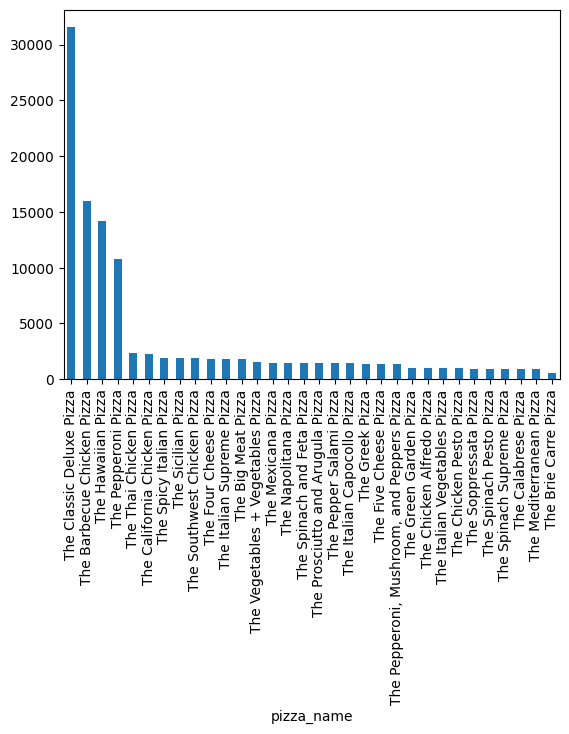

In [15]:
## Examing the distribution of catagorical columns(univeriant analysie)

categorical_cols = df[["price_band", "pizza_name_by_id","pizza_size",
       "pizza_category",  "pizza_name"]].columns

for col in categorical_cols:
  print(f"Value Counts for '{col}':")
  display(df[col].value_counts().plot(kind="bar"))

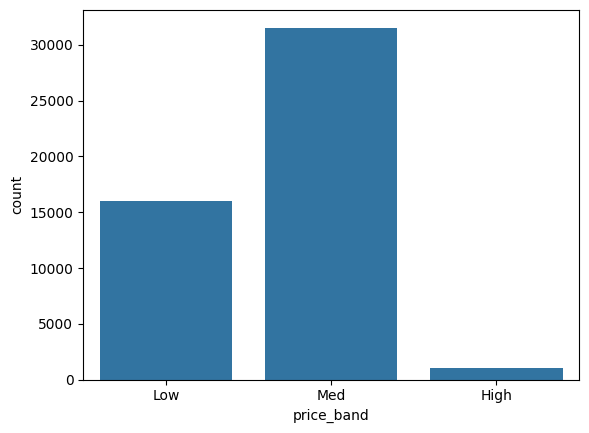

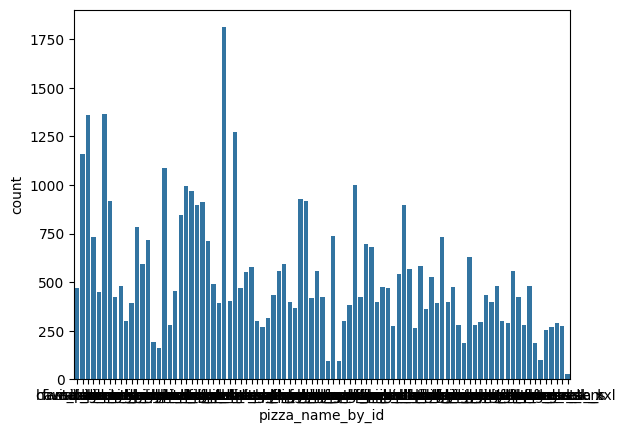

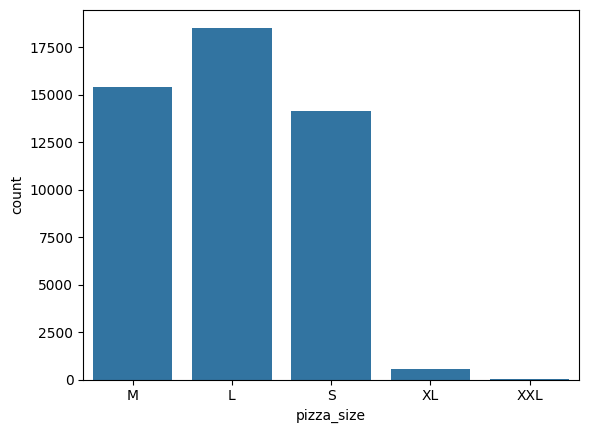

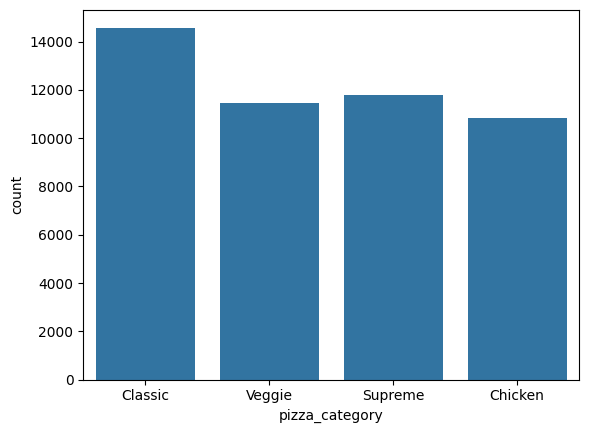

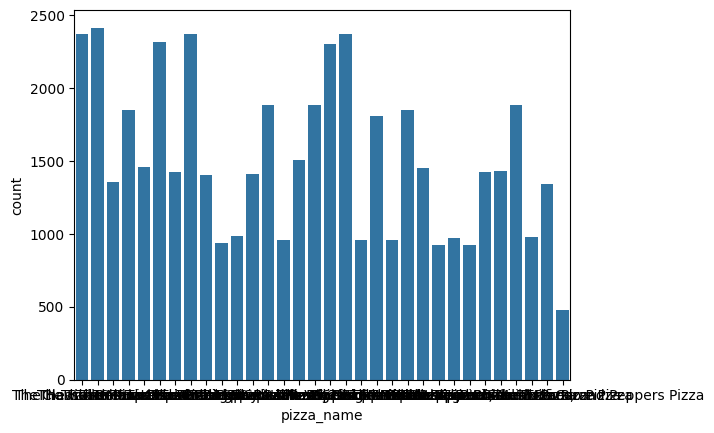

In [16]:
for i, predictor in enumerate(df[["price_band", "pizza_name_by_id","pizza_size",
       "pizza_category",  "pizza_name"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

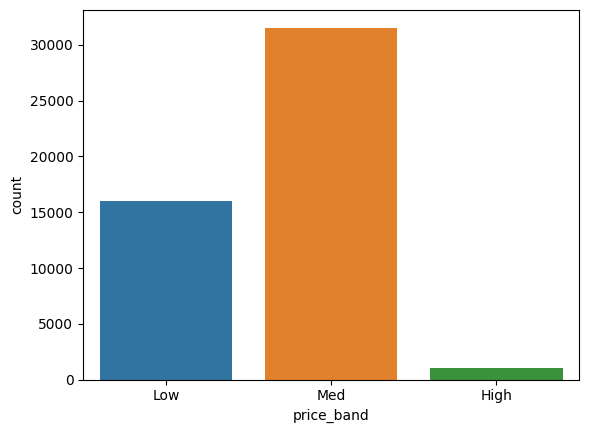

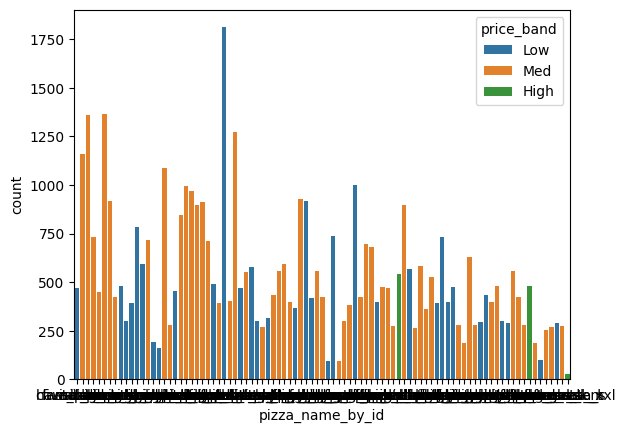

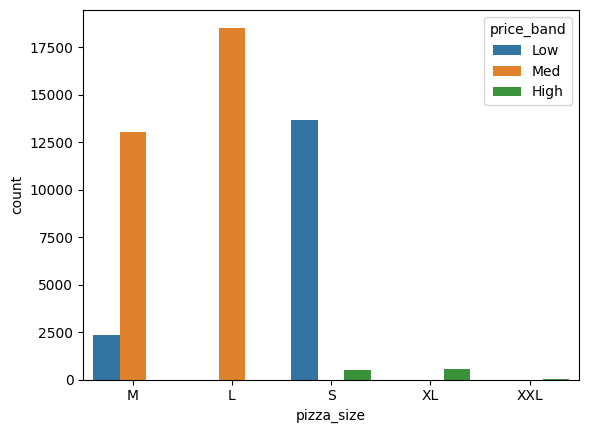

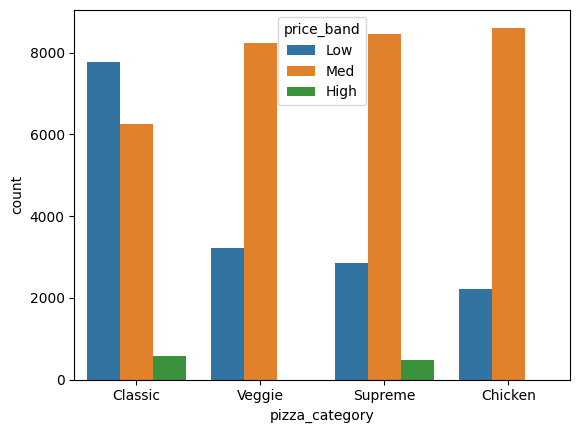

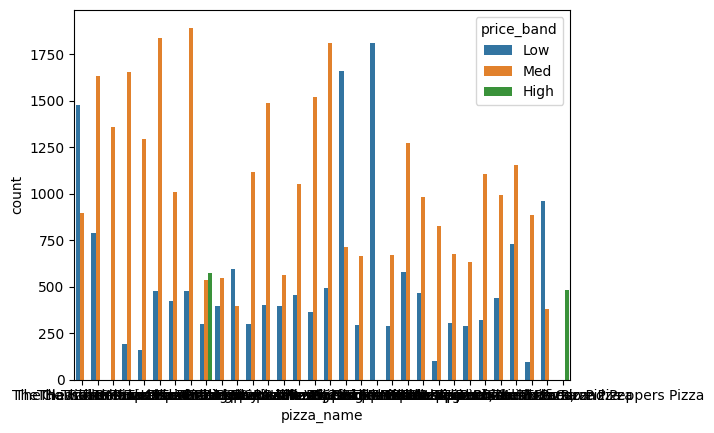

In [17]:

## THIS IS FOR BIVARIENT ANALYSIS

## using price_band as hue

for i, predictor in enumerate(df[["price_band", "pizza_name_by_id","pizza_size", "pizza_category",  "pizza_name"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='price_band')



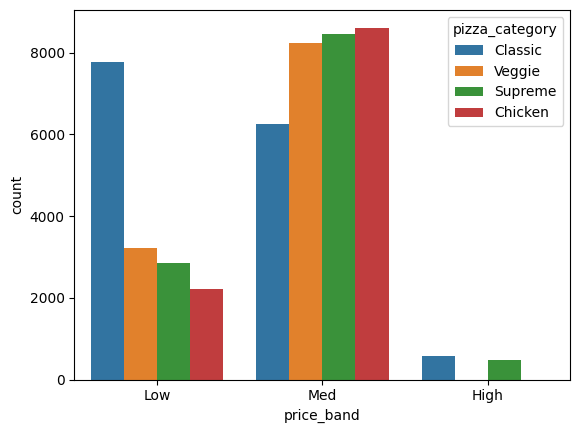

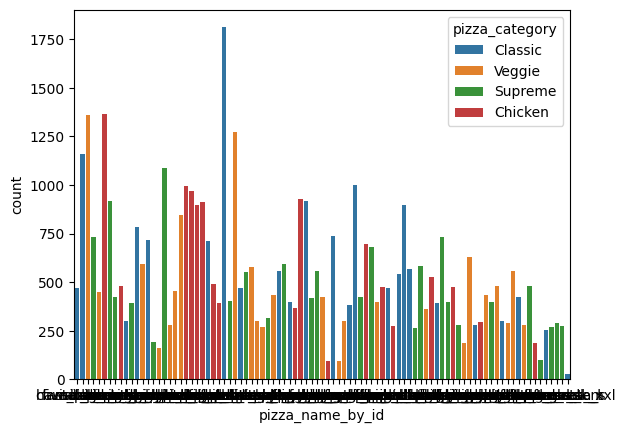

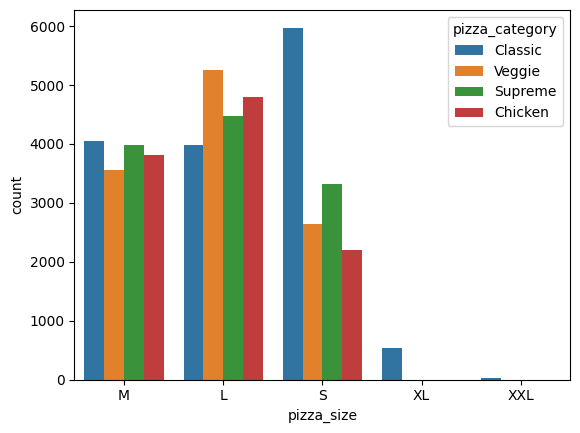

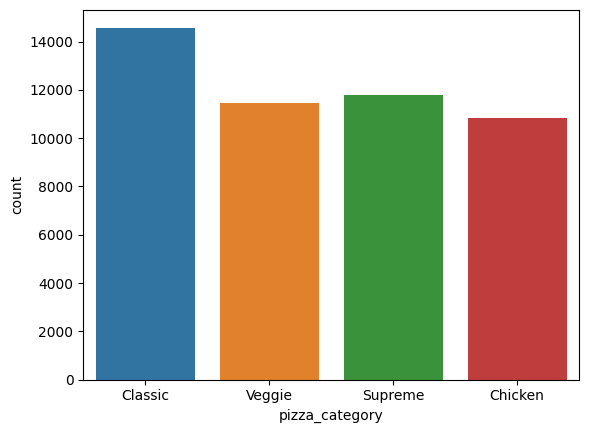

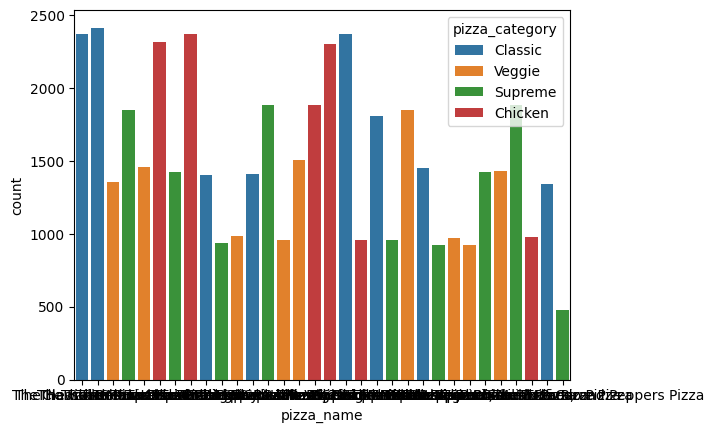

In [18]:
## using pizza_category as hue

for i, predictor in enumerate(df[["price_band", "pizza_name_by_id","pizza_size", "pizza_category",  "pizza_name"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='pizza_category')

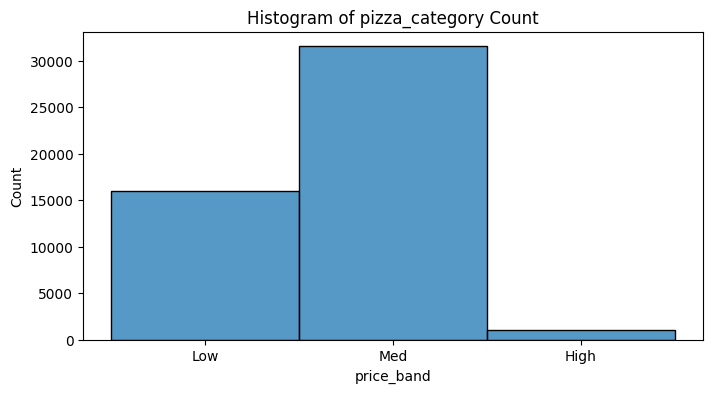

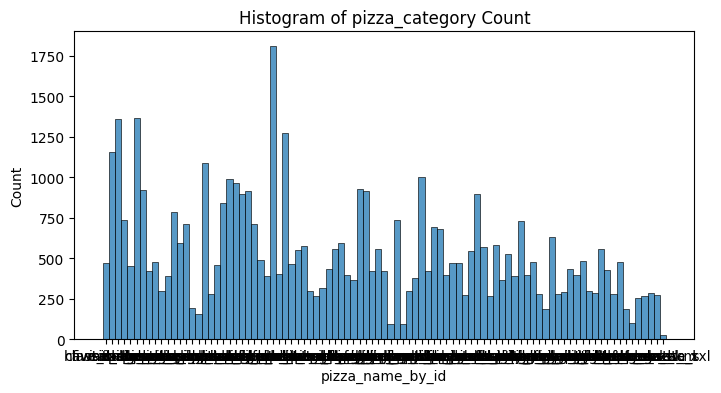

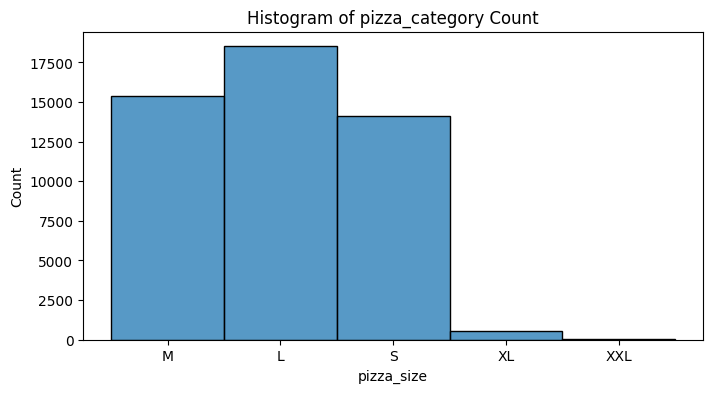

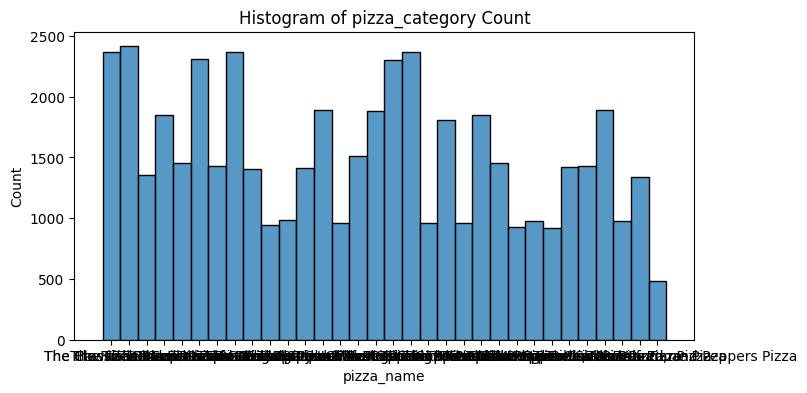

In [19]:
### HISTOGRAM PLOTS 

# HIstplot of pizza_category 

for col in categorical_cols:
  if col == "pizza_category":
   continue
  plt.figure(figsize=(8,4))
  sns.histplot(df[col])
  plt.title('Histogram of pizza_category Count')
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show() 



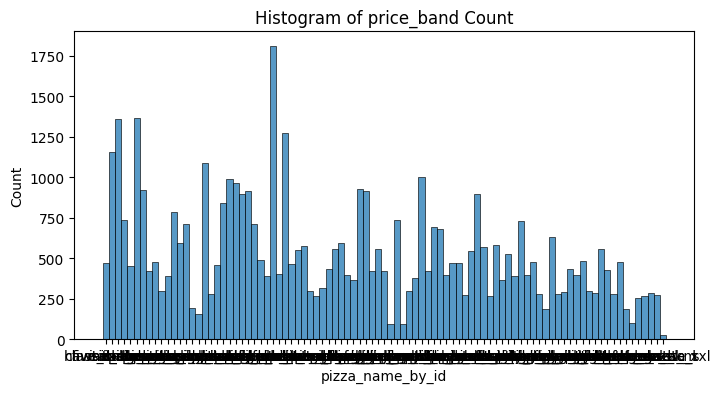

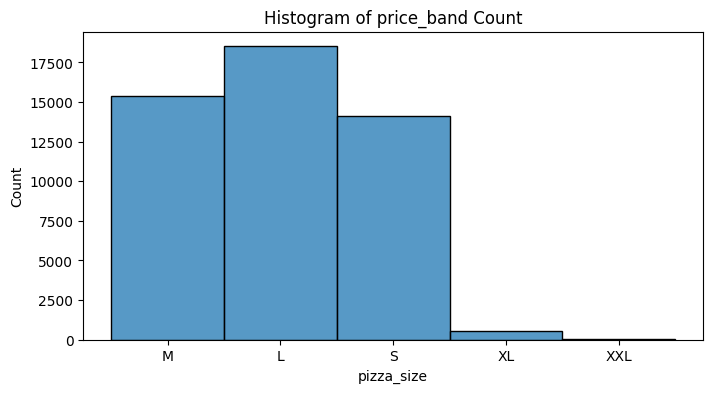

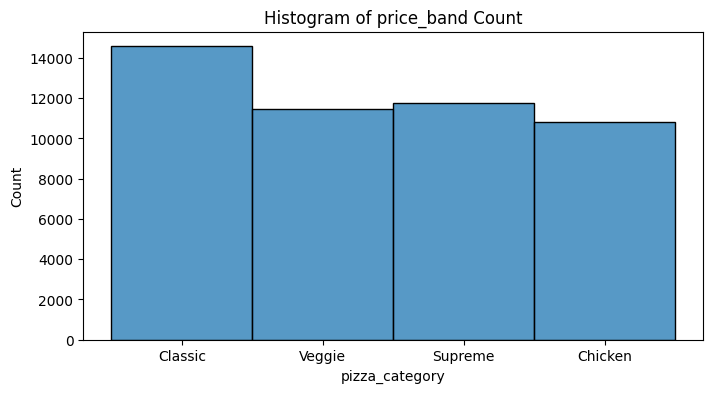

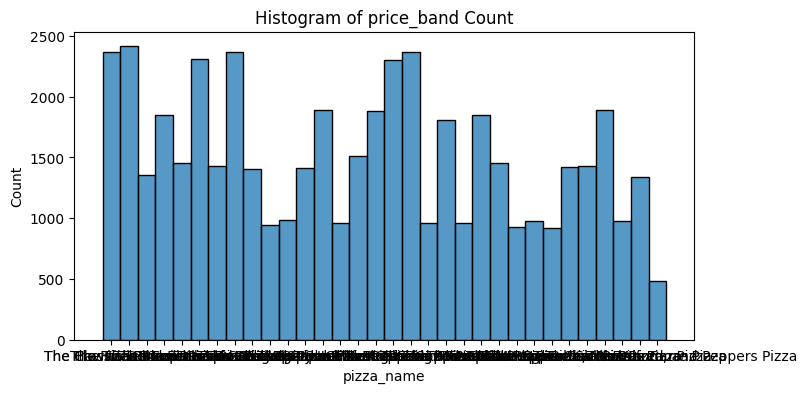

In [20]:


# HIstplot of price_band counts 

for col in categorical_cols:
  if col == "price_band":
   continue
  plt.figure(figsize=(8,4))
  sns.histplot(df[col])
  plt.title('Histogram of price_band Count')
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

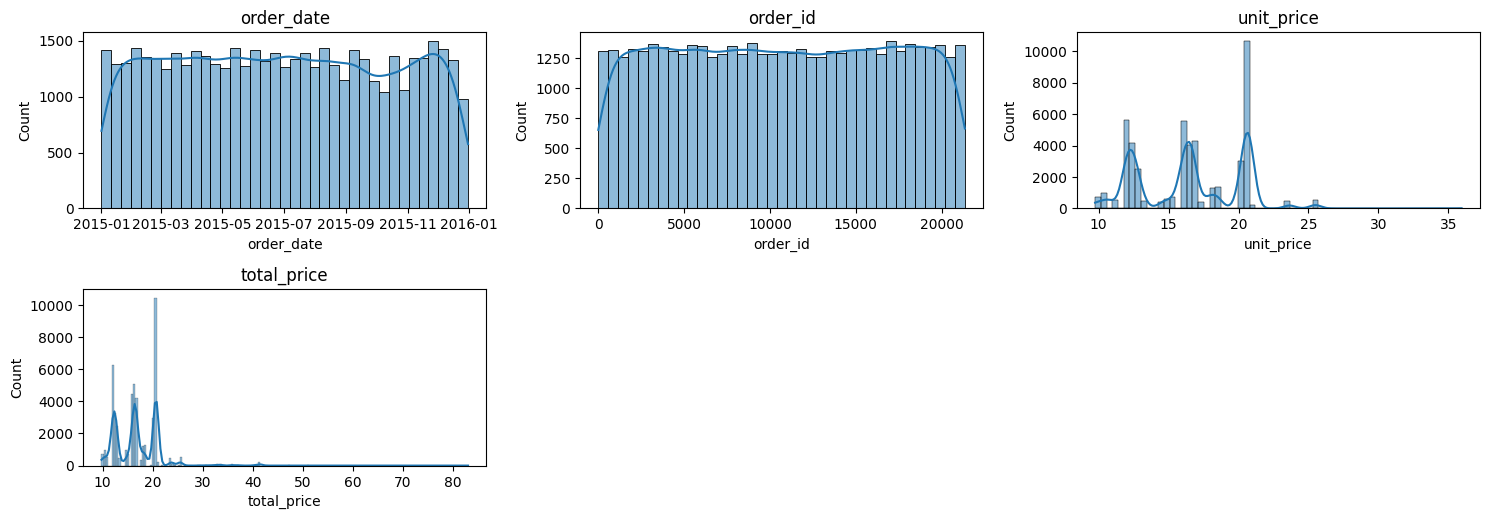

In [21]:

##NUMERIC ANALYSIS & VISUALIZATION

numerical_cols = ['order_date', 'order_id','unit_price', 'total_price']

# Univariate analysis and visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

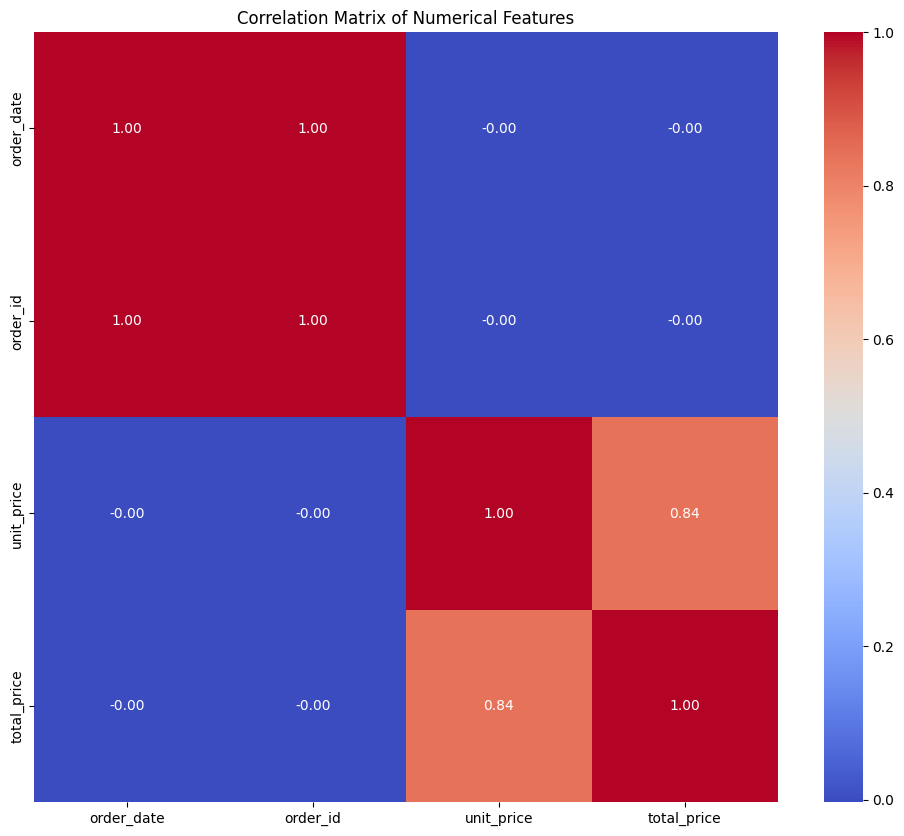

In [22]:
###   CREATING CORRELATION HEATMAP

numerical_cols = ['order_date', 'order_id','unit_price', 'total_price']

###  Calculate the correlation matrix

correlation_matrix = df[numerical_cols].corr()

###  Creating heatmap correlation 

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

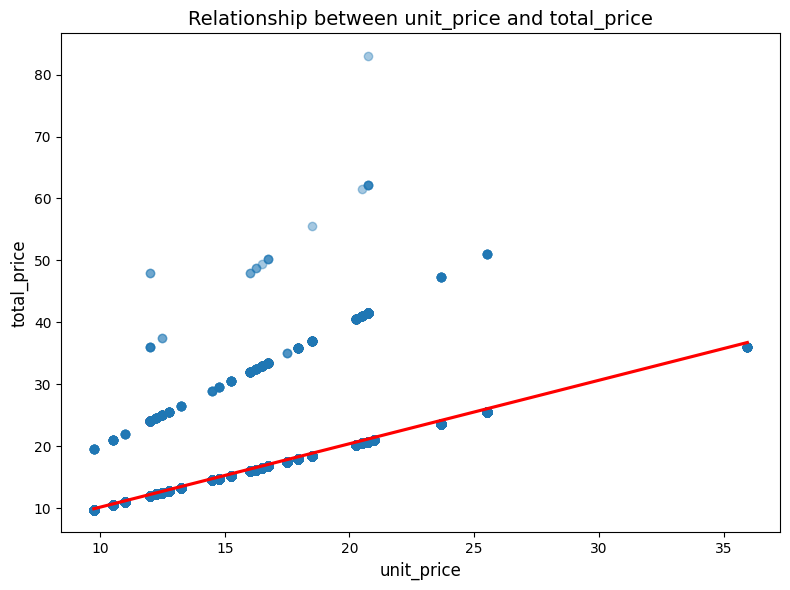

In [23]:
pairs_to_plot = [
    ('unit_price', 'total_price'),
    
]


for x_col, y_col in pairs_to_plot:
    plt.figure(figsize=(8, 6))
    sns.regplot(
        data=df,
        x=x_col,
        y=y_col,
        scatter_kws={'alpha': 0.4},     
        line_kws={'color': 'red'}       
    )
    plt.title(f'Relationship between {x_col} and {y_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.tight_layout()
    plt.show()

In [24]:
## LOADING THE PIZZA SALES DATASET INTO SQL(POSTGRESSQL) FOR FURTHER ANALYSIS

## connecting to a SQL database and loading the data into a SQL table

import urllib.parse
from sqlalchemy import create_engine

## 1. Define your credentials
username = "postgres"         ## database username
password = "oduor@8403"       ## If password contains @, #, or !, quoting handles it
host = "localhost"            ## or your database server address
port = "5432"                 ## default port for PostgreSQL
database = "pizza_sales_dataset"   ## database name you want to connect to in your pgAdmin

## 2. Encode the password to handle special characters safely
safe_password = urllib.parse.quote_plus(password)

## 3. Construct the engine URL correctly
## Note: Ensure it is 'postgresql' (with an 'l') and not 'postgresq1'
url = f"postgresql+psycopg2://{username}:{safe_password}@{host}:{port}/{database}"

engine = create_engine(url)

## 4. Test the connection
try:
    with engine.connect() as connection:
        print("Successfully connected to the database!")
        df.to_sql("pizza_sales_dataset", engine, if_exists="replace", index=False)
except Exception as e:
    print(f"An error occurred: {e}")


Successfully connected to the database!
